In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

# Load data

In [2]:
# We load the database of students enrolled in 2019

df1 = pd.read_csv("Alumnos matriculados en educación tradicional y CLEI según rangos de edad por jornada.csv",
                   delimiter=";")

# We load the database of students enrolled in 2022

df2 = pd.read_csv("Alumnos matriculados en educación tradicional y CLEI según rangos de edad por jornada2.CSV",
                  encoding="ISO-8859-1")

# Concat both dataframes

In [3]:
# Now we concat the 2019 and 2022 dataframes with the help of pandas.concat function

df = pd.concat([df1, df2], ignore_index=True)

In [4]:
# Now we want to filter for Educación Preescolar and Básica primaria only:

names = ['Preescolar', 'Básica primaria']

df = df[df['NIVELENSE_NOMBRE'].isin(names)]

In [5]:
# Now we want to know the total number of students enrolled (men + women)

df['JORNTRA_CANTIDAD_TOTAL'] = (df['JORNTRA_CANTIDAD_HOMBRE'] +
                                (df['JORNTRA_CANTIDAD_MUJER']))

# Now let's rename some of the column names: 

df = df.rename(columns={'PERIODO_ANIO': 'Año',
                        'GRADO_NOMBRE': 'Grado',
                        'JORNTRA_CANTIDAD_HOMBRE': 'Masculino',
                        'JORNTRA_CANTIDAD_MUJER': 'Femenino',
                        'JORNTRA_CANTIDAD_TOTAL': 'Total'})

df

,SEDE_CODIGO,PERIODO_ID,Año,JORNADA_ID,JORNADA_CODIGO,JORNADA_NOMBRE,TIPOMATRI_ID,TIPOMATRI_CODIGO,TIPOMATRI_NOMBRE,GRADO_ID,...,NIVELENSE_ID,NIVELENSE_CODIGO,NIVELENSE_NOMBRE,GRUPOMODELO_ID,RANGOEDAD_ID,RANGOEDAD_CODIGO,RANGOEDAD_NOMBRE,Masculino,Femenino,Total
0,313001800548,6,2019,2,2,Mañana,1,1,Matrícula propia,3,...,1,01,Preescolar,1,3,3,6,4,2,6
1,105001000094,6,2019,3,3,Tarde,1,1,Matrícula propia,1,...,1,01,Preescolar,1,1,1,3,27,36,63
2,105001000094,6,2019,3,3,Tarde,1,1,Matrícula propia,2,...,1,01,Preescolar,1,1,1,3,26,32,58
3,105001000094,6,2019,3,3,Tarde,1,1,Matrícula propia,3,...,1,01,Preescolar,1,1,1,3,31,22,53
4,313001800548,6,2019,2,2,Mañana,1,1,Matrícula propia,4,...,2,02,Básica primaria,1,3,3,6,11,4,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853268,376248000961,9,2022,2,2,Mañana,1,1,Matrícula propia,5,...,2,02,Básica primaria,1,3,3,6--8,4,7,11
853269,376248000961,9,2022,2,2,Mañana,1,1,Matrícula propia,6,...,2,02,Básica primaria,1,3,3,6--8,4,1,5
853270,376248000961,9,2022,2,2,Mañana,1,1,Matrícula propia,7,...,2,02,Básica primaria,1,4,4,9--12,1,3,4
853271,376248000961,9,2022,2,2,Mañana,1,1,Matrícula propia,8,...,2,02,Básica primaria,1,4,4,9--12,5,1,6


# Pivot table 1

In [6]:
# Let's find out the total number of students enrolled by year and grade. Then we shape the data to the stacked format:

matricula = (df.pivot_table(index='Grado',
                           columns='Año',
                           aggfunc='sum',
                           values='Total')
             .stack(future_stack=True)
             .reset_index()
             .rename(columns={0: "value"}))

matricula

,Grado,Año,value
0,1.°,2019,755330
1,1.°,2022,745268
2,2.°,2019,717016
3,2.°,2022,700504
4,3.°,2019,710807
5,3.°,2022,692524
6,4.°,2019,712398
7,4.°,2022,699474
8,5.°,2019,721933
9,5.°,2022,701427


## Graph 1

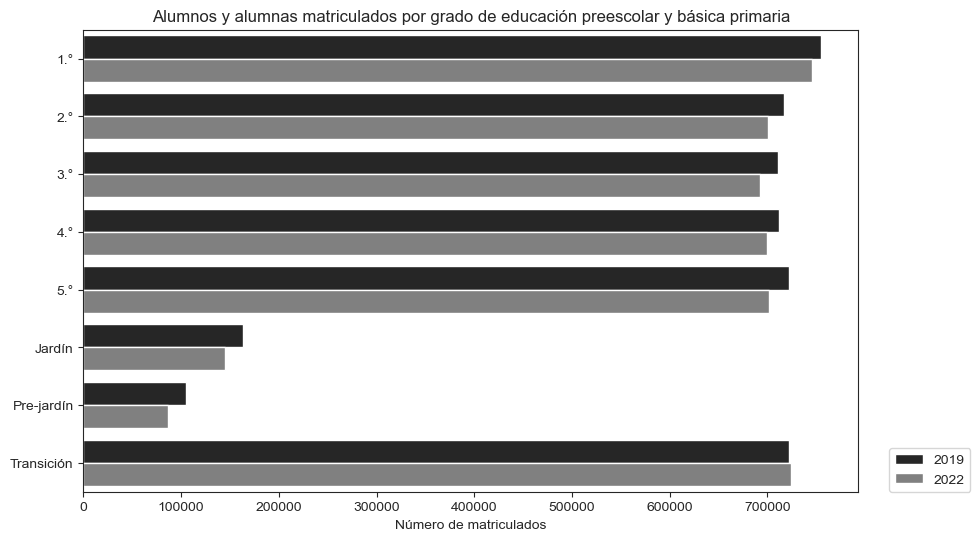

In [7]:
# Now we can graph a barplot:

sns.set_style('ticks')

plt.title('Alumnos y alumnas matriculados por grado de educación preescolar y básica primaria')

g1 = sns.barplot(data=matricula,
                 x='value',
                 y='Grado',
                 hue='Año',
                 orient='h',
                 palette='dark:gray')

g1.set_xlabel('Número de matriculados')
g1.set_ylabel(None)

plt.legend(loc=(1.04, 0))

# plt.savefig('matriculados1.pdf', bbox_inches='tight')

# Pivot table 2

In [8]:
# Now we want to know the distribution of total number of students enrolled by year grade and sex. Then we shape the data to the stacked format:

matricula_cat = (df.pivot_table(index='Grado',
                           columns='Año',
                           aggfunc='sum',
                           values=['Masculino', 'Femenino'])
             .stack(future_stack=True)
             .stack(future_stack=True)
             .reset_index()
             .rename(columns={0: "value", 'level_2': 'Género'}))

matricula_cat

,Grado,Año,Género,value
0,1.°,2019,Femenino,363533
1,1.°,2019,Masculino,391797
2,1.°,2022,Femenino,361669
3,1.°,2022,Masculino,383599
4,2.°,2019,Femenino,347520
...,...,...,...,...
27,Pre-jardín,2022,Masculino,43402
28,Transición,2019,Femenino,352417
29,Transición,2019,Masculino,369787
30,Transición,2022,Femenino,356241


## Graph 2

Text(34.19099999999999, 0.5, 'Número de matriculados')

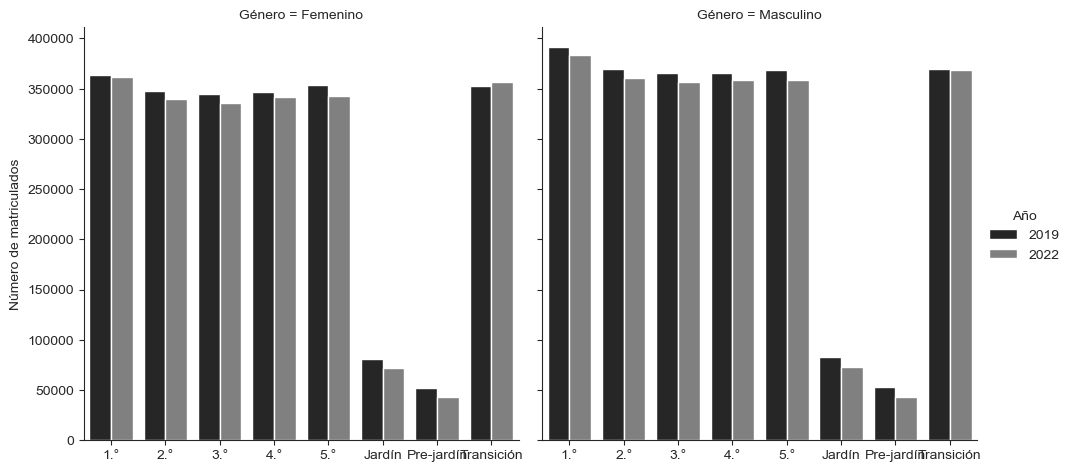

In [9]:
# Now we can graph a barplot:

sns.set_style('ticks')

g2 = sns.catplot(data=matricula_cat,
                kind='bar',
                x='Grado',
                y='value',
                hue='Año',
                col='Género',
                palette='dark:gray')

g2.axes[0,0].set_xlabel(None)
g2.axes[0,1].set_xlabel(None)
g2.axes[0,0].set_ylabel('Número de matriculados')

# plt.savefig('matriculados22.pdf', bbox_inches='tight')

## Percentage of students enrolled

In [10]:
# Here we calculate the percentage change in students enrolled in pre-school and primary education 2019 v.s 2022:

ano = (df.pivot_table(index='Año',
                      columns='NIVELENSE_NOMBRE',
                      aggfunc='sum',
                      values='Total')
       .pct_change())

ano

NIVELENSE_NOMBRE,Básica primaria,Preescolar
Año,,
2019,NaN,NaN
2022,-0.021641,-0.035862
